In [139]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflowjs as tfjs
import numpy as np
import pandas as pd
import os
from math import sqrt
from datetime import datetime, timedelta
#tf.compat.v1.disable_eager_execution()
from sklearn.preprocessing import MinMaxScaler
from pandas.io import gbq


In [2]:
df=pd.read_csv('/home/nusa/Documents/ProjectBangkit2021/data/pollution_data.csv')

In [3]:
df

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,1/1/2010,60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG,JAKARTA
1,1/2/2010,32.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK,JAKARTA
2,1/3/2010,27.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK,JAKARTA
3,1/4/2010,22.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK,JAKARTA
4,1/5/2010,25.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK,JAKARTA
...,...,...,...,...,...,...,...,...,...,...
4083,3/27/2021,62.0,49.0,13.0,63.0,33.0,91.0,PM25,SEDANG,JAKARTA
4084,3/28/2021,57.0,43.0,15.0,71.0,31.0,78.0,PM25,SEDANG,JAKARTA
4085,3/29/2021,65.0,48.0,19.0,67.0,37.0,91.0,PM25,SEDANG,JAKARTA
4086,3/30/2021,59.0,42.0,15.0,55.0,30.0,76.0,PM25,SEDANG,JAKARTA


In [4]:
df.values.shape

(4088, 10)

In [5]:
df.drop('critical', axis=1, inplace=True)
df.drop('categori', axis=1, inplace=True)
df.drop('lokasi_spku', axis=1, inplace=True)

In [6]:
df.values.shape

(4088, 7)

In [7]:
df.head(1)

,tanggal,pm10,so2,co,o3,no2,max
0,1/1/2010,60.0,4.0,73.0,27.0,14.0,73.0


In [8]:
df['tanggal'] = pd.to_datetime(df['tanggal'])
df.set_index('tanggal', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4088 entries, 2010-01-01 to 2021-03-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm10    4088 non-null   float64
 1   so2     4088 non-null   float64
 2   co      4088 non-null   float64
 3   o3      4088 non-null   float64
 4   no2     4088 non-null   float64
 5   max     4088 non-null   float64
dtypes: float64(6)
memory usage: 223.6 KB


In [9]:
df.head()

,pm10,so2,co,o3,no2,max
tanggal,,,,,,
2010-01-01,60.0,4.0,73.0,27.0,14.0,73.0
2010-01-02,32.0,2.0,16.0,33.0,9.0,33.0
2010-01-03,27.0,2.0,19.0,20.0,9.0,27.0
2010-01-04,22.0,2.0,16.0,15.0,6.0,22.0
2010-01-05,25.0,2.0,17.0,15.0,8.0,25.0


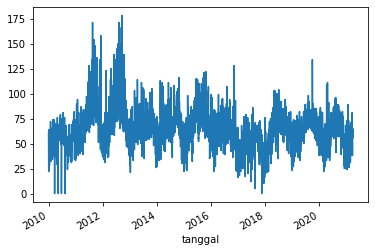

In [10]:
df['pm10'].plot();

In [11]:
target_names = ['pm10', 'so2', 'co', 'o3', 'no2']

In [12]:
shift_steps = 1

In [13]:
df_targets = df[target_names].shift(-shift_steps)

In [14]:
df[target_names].head(shift_steps + 5)

,pm10,so2,co,o3,no2
tanggal,,,,,
2010-01-01,60.0,4.0,73.0,27.0,14.0
2010-01-02,32.0,2.0,16.0,33.0,9.0
2010-01-03,27.0,2.0,19.0,20.0,9.0
2010-01-04,22.0,2.0,16.0,15.0,6.0
2010-01-05,25.0,2.0,17.0,15.0,8.0
2010-01-06,30.0,3.0,22.0,19.0,11.0


In [15]:
df_targets.head(5)

,pm10,so2,co,o3,no2
tanggal,,,,,
2010-01-01,32.0,2.0,16.0,33.0,9.0
2010-01-02,27.0,2.0,19.0,20.0,9.0
2010-01-03,22.0,2.0,16.0,15.0,6.0
2010-01-04,25.0,2.0,17.0,15.0,8.0
2010-01-05,30.0,3.0,22.0,19.0,11.0


In [16]:
df_targets.tail()

,pm10,so2,co,o3,no2
tanggal,,,,,
2021-03-27,57.0,43.0,15.0,71.0,31.0
2021-03-28,65.0,48.0,19.0,67.0,37.0
2021-03-29,59.0,42.0,15.0,55.0,30.0
2021-03-30,56.0,43.0,18.0,48.0,25.0
2021-03-31,NaN,NaN,NaN,NaN,NaN


In [17]:
x_data = df.values[0:-shift_steps]

In [18]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (4087, 6)


In [19]:
y_data = df_targets.values[:-shift_steps]

In [20]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (4087, 5)


In [21]:
num_data = len(x_data)
num_data

4087

In [22]:
train_split = 0.9

In [23]:
num_train = int(train_split * num_data)
num_train

3678

In [24]:
num_test = num_data - num_train
num_test

409

In [25]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

4087

In [26]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

4087

In [27]:
num_x_signals = x_data.shape[1]
num_x_signals

6

In [28]:
num_y_signals = y_data.shape[1]
num_y_signals

5

In [29]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 0.0
Max: 314.0


In [30]:
x_scaler = MinMaxScaler()

In [31]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [32]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [33]:
x_test_scaled = x_scaler.transform(x_test)

In [34]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [35]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(3678, 6)
(3678, 5)


In [36]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    while True:
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        for i in range(batch_size):
            idx = np.random.randint(num_train - sequence_length)
            
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [37]:
batch_size = 128

In [38]:
sequence_length = 366

In [39]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [40]:
x_batch, y_batch = next(generator)

In [41]:
print(x_batch.shape)
print(y_batch.shape)

(128, 366, 6)
(128, 366, 5)


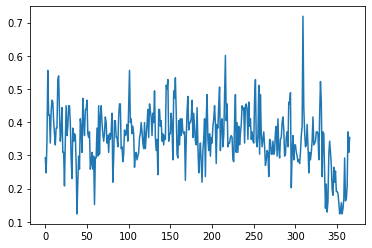

In [42]:
batch = 0
signal = 0
seq = x_batch[batch, :, signal]
plt.plot(seq)

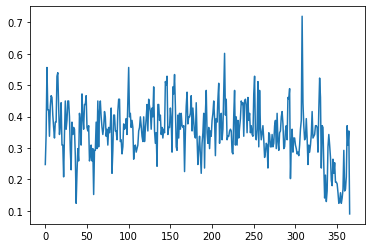

In [43]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [44]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [45]:
path_checkpoint = 'checkpoint.keras'
callback_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [46]:
callback_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                           patience=1, verbose=1)

In [47]:
callback_tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./logs/',
                                                      histogram_freq=0,
                                                      write_graph=False)

In [48]:
callback_reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                          factor=0.1,
                                                          min_lr=1e-4,
                                                          patience=0,
                                                          verbose=1)

In [49]:
model = tf.keras.models.Sequential([tf.keras.layers.GRU(units=256,
                                                        return_sequences=True,
                                                        input_shape=(None, num_x_signals,),
                                                        activation='tanh'),
                                    tf.keras.layers.GRU(units=512,
                                                        return_sequences=True,
                                                        input_shape=(None, num_x_signals,),
                                                        activation='tanh'),
                                    tf.keras.layers.GRU(units=256,
                                                        return_sequences=True,
                                                        input_shape=(None, num_x_signals,),
                                                        activation='tanh'),
                                    tf.keras.layers.Dense(num_y_signals, activation='sigmoid')
])
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(loss=tf.keras.losses.MSE,
              optimizer=optimizer,
              metrics=["mae"])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 256)         202752    
_________________________________________________________________
gru_1 (GRU)                  (None, None, 512)         1182720   
_________________________________________________________________
gru_2 (GRU)                  (None, None, 256)         591360    
_________________________________________________________________
dense (Dense)                (None, None, 5)           1285      
Total params: 1,978,117
Trainable params: 1,978,117
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(x=generator,
          epochs=20,
          steps_per_epoch=200,
          validation_data=validation_data,
          callbacks = [callback_early_stopping,
                       callback_checkpoint,
                       callback_tensorboard,
                       callback_reduce_lr])

Epoch 1/20
200/200 [==============================] - 122s 591ms/step - loss: 0.0141 - mae: 0.0866 - val_loss: 0.0292 - val_mae: 0.0996

Epoch 00001: val_loss improved from inf to 0.02920, saving model to checkpoint.keras
Epoch 2/20
200/200 [==============================] - 121s 603ms/step - loss: 0.0062 - mae: 0.0559 - val_loss: 0.0492 - val_mae: 0.1170

Epoch 00002: val_loss did not improve from 0.02920

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 00002: early stopping


In [52]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

Error trying to load checkpoint.
You are trying to load a weight file containing 4 layers into a model with 3 layers.


In [59]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 66ms/step - loss: 0.0279 - mae: 0.0915


In [54]:
print("loss (test-set):", result)

loss (test-set): [0.027855319902300835, 0.09149332344532013]


In [55]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    if train:
        x = x_train_scaled
        y_true = y_train
    else:
        x = x_test_scaled
        y_true = y_test
    
    end_idx = start_idx + length
    
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    x = np.expand_dims(x, axis=0)

    y_pred = model.predict(x)
    
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    _
    for signal in range(len(target_names)):
        signal_pred = y_pred_rescaled[:, signal]
        
        signal_true = y_true[:, signal]

        plt.figure(figsize=(7,3))
        
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        #p = plt.axvspan(0, 50, facecolor='black', alpha=0.15)
        
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

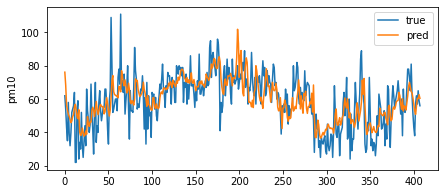

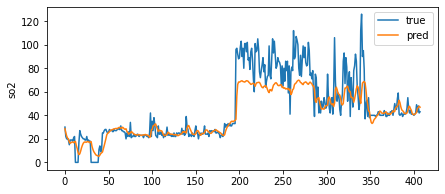

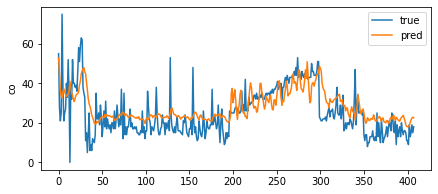

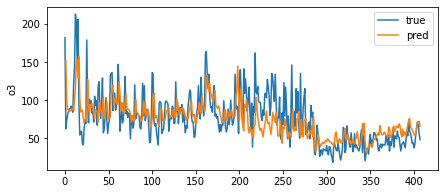

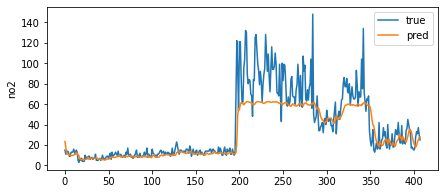

In [56]:
plot_comparison(start_idx=1, length=409, train=False)

In [57]:
#model.save("modelPredictall(=0.0279)5var.h5")

In [51]:
#model = tf.keras.models.load_model('modelPredictall(=0.032510507851839066).h5')
#model = tf.keras.models.load_model('modelPredictall(=0.02950630523264408).h5')
model = tf.keras.models.load_model('modelPredict')
#model = tf.keras.models.load_model('modelPredictall(=0.023562125861644745).h5')

In [370]:
x = x_test_scaled
y_true = y_test
start_idx=1 
length=10
end_idx = start_idx + length
x = x[start_idx:end_idx]
y_true = y_true[start_idx:end_idx]
x = np.expand_dims(x, axis=0)
y_pred = model.predict(x)
y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])

array([[ 76.146286 ,  28.619234 ,  52.917454 , 152.63713  ,  23.340473 ],
       [ 68.33756  ,  25.100754 ,  44.559853 , 152.32936  ,  17.552528 ],
       [ 56.417904 ,  22.368399 ,  37.04921  ,  96.59109  ,  11.9639015],
       [ 53.447258 ,  20.564726 ,  33.62974  ,  87.58977  ,  10.856805 ],
       [ 50.909435 ,  19.9299   ,  32.62447  ,  87.69547  ,  10.974268 ],
       [ 49.60847  ,  17.368273 ,  35.878647 ,  84.78273  ,  10.286073 ],
       [ 47.89903  ,  16.216208 ,  37.2325   ,  86.52861  ,   9.9123745],
       [ 45.855965 ,  16.807095 ,  35.57951  ,  86.06564  ,   9.482981 ],
       [ 46.902546 ,  17.229364 ,  34.472935 ,  88.825294 ,   9.723587 ],
       [ 49.48386  ,  17.310919 ,  33.433624 ,  88.937065 ,   9.910923 ]],
      dtype=float32)

In [371]:
y_pred[0]

array([[0.42778814, 0.39748937, 0.39490637, 0.4861055 , 0.3704837 ],
       [0.3839189 , 0.34862158, 0.33253622, 0.48512533, 0.27861157],
       [0.31695452, 0.3106722 , 0.27648664, 0.30761492, 0.1899032 ],
       [0.3002655 , 0.2856212 , 0.25096822, 0.2789483 , 0.17233023],
       [0.28600806, 0.27680415, 0.24346618, 0.27928495, 0.17419472],
       [0.27869928, 0.241226  , 0.2677511 , 0.27000868, 0.163271  ],
       [0.26909566, 0.2252251 , 0.27785447, 0.2755688 , 0.15733927],
       [0.25761777, 0.23343188, 0.26551872, 0.2740944 , 0.1505235 ],
       [0.26349744, 0.23929672, 0.2572607 , 0.2828831 , 0.15434265],
       [0.27799922, 0.24042943, 0.24950466, 0.28323907, 0.15731624]],
      dtype=float32)

In [58]:
x=x_test_scaled*inverse
x=x_scaler.inverse_transform(x_test_scaled)
x

NameError: name 'inverse' is not defined

In [201]:
x_test[1:409]

array([[ 43.,  21.,  30., 170.,  12., 170.],
       [ 62.,  30.,  55., 182.,  15., 182.],
       [ 54.,  22.,  28.,  62.,  11.,  62.],
       ...,
       [ 57.,  43.,  15.,  71.,  31.,  78.],
       [ 65.,  48.,  19.,  67.,  37.,  91.],
       [ 59.,  42.,  15.,  55.,  30.,  76.]])

In [387]:
x = x_data[-7:]
x

array([[43., 40., 11., 37., 15., 64.],
       [38., 41.,  9., 41., 17., 68.],
       [57., 42., 19., 53., 28., 83.],
       [62., 49., 13., 63., 33., 91.],
       [57., 43., 15., 71., 31., 78.],
       [65., 48., 19., 67., 37., 91.],
       [59., 42., 15., 55., 30., 76.]])

In [219]:
x = x_data[-7:]
x = x/inverse
x = np.expand_dims(x, axis=0)
for predict in range(7):
    x_pred = model.predict(x)
    x_new = x_pred[0][-1:]
    x_new = np.append(x_new, np.max(x_new))
    x = np.append(x, [[x_new]], axis=1)
    x = x.tolist()
x = np.delete(x[0], 5, 1)*rescale
x = x[-7:].round(2)    
pdata = pd.DataFrame(x, columns=['pm10', 'so2', 'co', 'o3', 'no2'])
pdata['max'] = np.max(pdata, axis=1)
pdata.insert(loc = 0, column = 'tanggal', value = pd.date_range(datetime.now()+timedelta(1), periods=len(pdata), freq='D').normalize())
#pdata.to_gbq(destination_table = 'AirQuality.predictions',
#     project_id = 'euphoric-fusion-312609',
#     if_exists = 'replace')
x = np.array(pdata)
x = np.expand_dims(x, axis=0)
tanggal, pm10, so2, co, o3, no2, max = np.dsplit(x, 7)
pollutant = {}
pollutant['tanggal'] = tanggal[0][-7:].tolist()
pollutant['pm10'] = pm10[0][-7:].tolist()
pollutant['so2'] = so2[0][-7:].tolist()
pollutant['co'] = co[0][-7:].tolist()
pollutant['o3'] = o3[0][-7:].tolist()
pollutant['no2'] = no2[0][-7:].tolist()
pollutant['max'] = max[0][-7:].tolist()
for substance, value in pollutant.items():
    pollutant[substance] = [value[0][0], value[1][0], value[2][0], value[3][0], 
                            value[4][0], value[5][0], value[6][0]]
pollutant['city'] = ["JAKARTA" for x in range(len(pollutant))]
pollutant
#x = np.expand_dims(x, axis=0)
#y.to_gbq(destination_table = 'AirQuality.predictions',
#         project_id = 'euphoric-fusion-312609',
#         if_exists = 'replace')

{'tanggal': [Timestamp('2021-06-09 00:00:00'),
  Timestamp('2021-06-10 00:00:00'),
  Timestamp('2021-06-11 00:00:00'),
  Timestamp('2021-06-12 00:00:00'),
  Timestamp('2021-06-13 00:00:00'),
  Timestamp('2021-06-14 00:00:00'),
  Timestamp('2021-06-15 00:00:00')],
 'pm10': [60.78, 60.49, 58.04, 55.12, 52.44, 50.17, 48.28],
 'so2': [45.52, 44.99, 44.28, 43.18, 41.88, 40.51, 39.13],
 'co': [24.51, 23.63, 22.94, 22.32, 21.81, 21.46, 21.24],
 'o3': [70.95, 85.96, 90.09, 90.16, 89.72, 89.6, 89.76],
 'no2': [25.88, 26.28, 25.31, 23.84, 22.3, 20.81, 19.38],
 'max': [70.95, 85.96, 90.09, 90.16, 89.72, 89.6, 89.76],
 'city': ['JAKARTA',
  'JAKARTA',
  'JAKARTA',
  'JAKARTA',
  'JAKARTA',
  'JAKARTA',
  'JAKARTA']}

In [215]:
def split_tensor_dict_list(tensor_dict):
    keys = list(tensor_dict.keys())
    ret = None
    for k in keys:
        vals = tensor_dict[k]
        if isinstance(vals, dict):
            vals = split_tensor_dict_list(vals)
        if ret is None:
            ret = [{k: v} for v in vals]
        else:
            for v, cur_dict in zip(vals, ret):
                cur_dict[k] = v
    return ret 
pollutant=split_tensor_dict_list(pollutant)
pollutant

[{'tanggal': Timestamp('2021-06-09 00:00:00'),
  'pm10': 60.78,
  'so2': 45.52,
  'co': 24.51,
  'o3': 70.95,
  'no2': 25.88,
  'max': 70.95,
  'city': 'JAKARTA'},
 {'tanggal': Timestamp('2021-06-10 00:00:00'),
  'pm10': 60.49,
  'so2': 44.99,
  'co': 23.63,
  'o3': 85.96,
  'no2': 26.28,
  'max': 85.96,
  'city': 'JAKARTA'},
 {'tanggal': Timestamp('2021-06-11 00:00:00'),
  'pm10': 58.04,
  'so2': 44.28,
  'co': 22.94,
  'o3': 90.09,
  'no2': 25.31,
  'max': 90.09,
  'city': 'JAKARTA'},
 {'tanggal': Timestamp('2021-06-12 00:00:00'),
  'pm10': 55.12,
  'so2': 43.18,
  'co': 22.32,
  'o3': 90.16,
  'no2': 23.84,
  'max': 90.16,
  'city': 'JAKARTA'},
 {'tanggal': Timestamp('2021-06-13 00:00:00'),
  'pm10': 52.44,
  'so2': 41.88,
  'co': 21.81,
  'o3': 89.72,
  'no2': 22.3,
  'max': 89.72,
  'city': 'JAKARTA'},
 {'tanggal': Timestamp('2021-06-14 00:00:00'),
  'pm10': 50.17,
  'so2': 40.51,
  'co': 21.46,
  'o3': 89.6,
  'no2': 20.81,
  'max': 89.6,
  'city': 'JAKARTA'},
 {'tanggal': Timest

In [55]:
pm10, so2, co, o3, no2 = np.dsplit(x, 5)
pollutant = {}
pollutant['pm10'] = pm10[0][-7:].tolist()
pollutant['so2'] = so2[0][-7:].tolist()
pollutant['co'] = co[0][-7:].tolist()
pollutant['o3'] = o3[0][-7:].tolist()
pollutant['no2'] = no2[0][-7:].tolist()
for substance, value in pollutant.items():
    pollutant[substance] = value[0][0], value[1][0], value[2][0], value[3][0], value[4][0], value[5][0], value[6][0]
pollutant

{'pm10': (60.78, 60.49, 58.04, 55.12, 52.44, 50.17, 48.28),
 'so2': (45.52, 44.99, 44.28, 43.18, 41.88, 40.51, 39.13),
 'co': (24.51, 23.63, 22.94, 22.32, 21.81, 21.46, 21.24),
 'o3': (70.95, 85.96, 90.09, 90.16, 89.72, 89.6, 89.76),
 'no2': (25.88, 26.28, 25.31, 23.84, 22.3, 20.81, 19.38)}

In [356]:
pm10, so2, co, o3, no2 = np.dsplit(x, 5)
pollutant = {}
pollutant['pm10'] = pm10[0][-7:].tolist()
pollutant['so2'] = so2[0][-7:].tolist()
pollutant['co'] = co[0][-7:].tolist()
pollutant['o3'] = o3[0][-7:].tolist()
pollutant['no2'] = no2[0][-7:].tolist()

(1, 14, 6)

In [122]:
z=np.array([[ 43.,  21.,  30., 170.,  12., 170.],
            [ 62.,  30.,  55., 182.,  15., 182.],
           ])
#z=x_scaler.transform(z)
z=np.expand_dims(z, axis=0)
z=z/inverse
z
#z_pred = model.predict(z)


array([[[0.24157303, 0.29166667, 0.2238806 , 0.54140127, 0.19047619,
         0.54140127],
        [0.34831461, 0.41666667, 0.41044776, 0.57961783, 0.23809524,
         0.57961783]]])

In [110]:
print('{"instances": \n',np.array2string(z, separator=', '),'\n}')

{"instances": 
 [[[0.24157303, 0.29166667, 0.2238806 , 0.54140127, 0.19047619,
   0.54140127],
  [0.34831461, 0.41666667, 0.41044776, 0.57961783, 0.23809524,
   0.57961783]]] 
}


In [58]:
x_test_scaled[1:10]

array([[0.24157303, 0.29166667, 0.2238806 , 0.54140127, 0.19047619,
        0.54140127],
       [0.34831461, 0.41666667, 0.41044776, 0.57961783, 0.23809524,
        0.57961783],
       [0.30337079, 0.30555556, 0.20895522, 0.19745223, 0.17460317,
        0.19745223],
       [0.24157303, 0.27777778, 0.15671642, 0.23248408, 0.20634921,
        0.23248408],
       [0.19662921, 0.27777778, 0.18656716, 0.25477707, 0.22222222,
        0.25477707],
       [0.3258427 , 0.26388889, 0.55970149, 0.27070064, 0.20634921,
        0.27070064],
       [0.21910112, 0.20833333, 0.2761194 , 0.28025478, 0.14285714,
        0.28025478],
       [0.17977528, 0.26388889, 0.15671642, 0.28343949, 0.14285714,
        0.28343949],
       [0.2247191 , 0.26388889, 0.18656716, 0.29299363, 0.20634921,
        0.29299363]])

In [55]:
y_true

array([[ 62.,  30.,  55., 182.,  15.],
       [ 54.,  22.,  28.,  62.,  11.],
       [ 43.,  20.,  21.,  73.,  13.],
       [ 35.,  20.,  25.,  80.,  14.],
       [ 58.,  19.,  75.,  85.,  13.],
       [ 39.,  15.,  37.,  88.,   9.],
       [ 32.,  19.,  21.,  89.,   9.],
       [ 40.,  19.,  25.,  92.,  13.],
       [ 52.,  19.,  27.,  89.,  13.],
       [ 54.,  18.,  40.,  84.,  13.]])

In [54]:
z=np.array([[[0.24157303, 0.29166667, 0.2238806 , 0.54140127, 0.19047619, 0.54140127],
             [0.34831461, 0.41666667, 0.41044776, 0.57961783, 0.23809524, 0.57961783],
             [0.30337079, 0.30555556, 0.20895522, 0.19745223, 0.17460317, 0.19745223]]])
#z=np.expand_dims(z, axis=0)
z

array([[[0.24157303, 0.29166667, 0.2238806 , 0.54140127, 0.19047619,
         0.54140127],
        [0.34831461, 0.41666667, 0.41044776, 0.57961783, 0.23809524,
         0.57961783],
        [0.30337079, 0.30555556, 0.20895522, 0.19745223, 0.17460317,
         0.19745223]]])

In [57]:
z=model.predict(z)
z=z*inverse
pm10, so2, co, o3, no2 = np.dsplit(z, 5)
print(pm10)
print(so2)
print(co)
print(o3)
print(no2)

[[[64.96740764]
  [50.46944284]
  [44.42704025]]]
[[[27.75417709]
  [21.60859466]
  [18.29098535]]]
[[[54.03923112]
  [44.31462801]
  [39.80424863]]]
[[[112.19915712]
  [ 92.25686717]
  [ 87.32832658]]]
[[[23.2341249 ]
  [18.31854719]
  [16.31937531]]]


In [1]:
y_pred

In [89]:
y_pred_rescaled

array([[ 76.146286 ,  28.619234 ,  52.917454 , 152.63713  ,  23.340473 ],
       [ 68.33756  ,  25.100754 ,  44.559853 , 152.32936  ,  17.552528 ],
       [ 56.417904 ,  22.368399 ,  37.04921  ,  96.59109  ,  11.9639015],
       [ 53.447258 ,  20.564726 ,  33.62974  ,  87.58977  ,  10.856805 ],
       [ 50.909435 ,  19.9299   ,  32.62447  ,  87.69547  ,  10.974268 ],
       [ 49.60847  ,  17.368273 ,  35.878647 ,  84.78273  ,  10.286073 ],
       [ 47.89903  ,  16.216208 ,  37.2325   ,  86.52861  ,   9.9123745],
       [ 45.855965 ,  16.807095 ,  35.57951  ,  86.06564  ,   9.482981 ],
       [ 46.902546 ,  17.229364 ,  34.472935 ,  88.825294 ,   9.723587 ],
       [ 49.48386  ,  17.310919 ,  33.433624 ,  88.937065 ,   9.910923 ]],
      dtype=float32)

In [65]:
error=y_true-y_pred_rescaled

In [66]:
RMSE=sum((error**2)**0.5)/num_test
RMSE

array([ 9.80446512,  8.77282145,  7.24068196, 18.02030243, 10.63599659])

In [72]:
RMSE=sum((error**2)**0.5)/num_test
RMSE

array([ 9.80446512,  8.77282145,  7.24068196, 18.02030243, 10.63599659])

In [55]:
inverse= np.max(x_data,axis=0)
inverse

array([178., 126., 134., 314., 148., 314.])

In [165]:
#tfjs.converters.save_keras_model(model, '/home/nusa/Desktop/model')

In [53]:
inverse = np.max(x_train,axis=0)
rescale = np.max(y_train,axis=0)
inverse

array([178.,  72., 134., 314.,  63., 314.])